In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
SEED = 7

# Data and Description

In [3]:
disorder = pd.read_csv('data/Dataset-Mental-Disorders.csv',index_col=0)
disorder.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,Usually,Seldom,NaN,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [4]:
disorder.shape

(120, 18)

There are total 120 objeservations and 18 features.

In [5]:
disorder.describe().T

,count,unique,top,freq
Sadness,120,4,Usually,42
Euphoric,120,4,Seldom,46
Exhausted,117,4,Sometimes,35
Sleep dissorder,116,4,Sometimes,40
Mood Swing,120,2,NO,63
Suicidal thoughts,120,3,NO,63
Anorxia,118,2,NO,72
Authority Respect,114,2,NO,67
Try-Explanation,120,2,NO,63
Aggressive Response,120,2,NO,62


In [6]:
disorder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, Patiant-01 to Patiant-120
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            117 non-null    object
 3   Sleep dissorder      116 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              118 non-null    object
 7   Authority Respect    114 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     113 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       114 non-null    object
 13  Overthinking         119 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 

All the columns are of object types.

In [7]:
disorder.duplicated().sum()

0

No duplicate row is present.

# Data Cleaning

In [8]:
disorder.rename(columns={'Sleep dissorder':'Sleep disorder','Anorxia':'Anorexia','Optimisim':'Optimism'},inplace=True)

In [9]:
disorder['Expert Diagnose'].value_counts()

Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: Expert Diagnose, dtype: int64

The dataset is balanced.

In [10]:
disorder.isnull().sum()

Sadness                0
Euphoric               0
Exhausted              3
Sleep disorder         4
Mood Swing             0
Suicidal thoughts      0
Anorexia               2
Authority Respect      6
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       7
Nervous Break-down     0
Admit Mistakes         6
Overthinking           1
Sexual Activity        0
Concentration          0
Optimism               0
Expert Diagnose        0
dtype: int64

Some columns have a few null values. Let us treat them first

In [11]:
print("Percent of missing data: %.2f" % ((np.sum(disorder.isnull().any())/len(disorder))*100),'%')

Percent of missing data: 5.83 %


In [12]:
null_col = [col for col in disorder.columns if disorder[col].isnull().any()]

for col in null_col:
    disorder[col] = disorder[col].fillna(disorder[col].mode()[0])

In [13]:
for col in disorder.columns:
    print(col)
    print(disorder[col].value_counts())

Sadness
Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: Sadness, dtype: int64
Euphoric
Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: Euphoric, dtype: int64
Exhausted
Sometimes     38
Usually       34
Most-Often    30
Seldom        18
Name: Exhausted, dtype: int64
Sleep disorder
Sometimes     44
Usually       34
Most-Often    21
Seldom        21
Name: Sleep disorder, dtype: int64
Mood Swing
NO     63
YES    57
Name: Mood Swing, dtype: int64
Suicidal thoughts
NO      63
YES     56
YES      1
Name: Suicidal thoughts, dtype: int64
Anorexia
NO     74
YES    46
Name: Anorexia, dtype: int64
Authority Respect
NO     73
YES    47
Name: Authority Respect, dtype: int64
Try-Explanation
NO     63
YES    57
Name: Try-Explanation, dtype: int64
Aggressive Response
NO     62
YES    58
Name: Aggressive Response, dtype: int64
Ignore & Move-On
NO     70
YES    50
Name: Ignore & Move-On, dtype: int64
Nervous Break-down
YES    62
NO     58
Name: Nervous 

Suicidal thoughts have two values for yes. We need to handle it.

In [14]:
disorder.loc[:,'Suicidal thoughts'] = disorder.loc[:,'Suicidal thoughts'].str.strip()

disorder['Suicidal thoughts'].value_counts()

NO     63
YES    57
Name: Suicidal thoughts, dtype: int64

In [15]:
for j in range(14,17):
    for i in range(len(disorder)):
        disorder.iloc[i,j] = int(disorder.iloc[i,j][0])

# Exploratory Data Analysis

## Distributions of columns

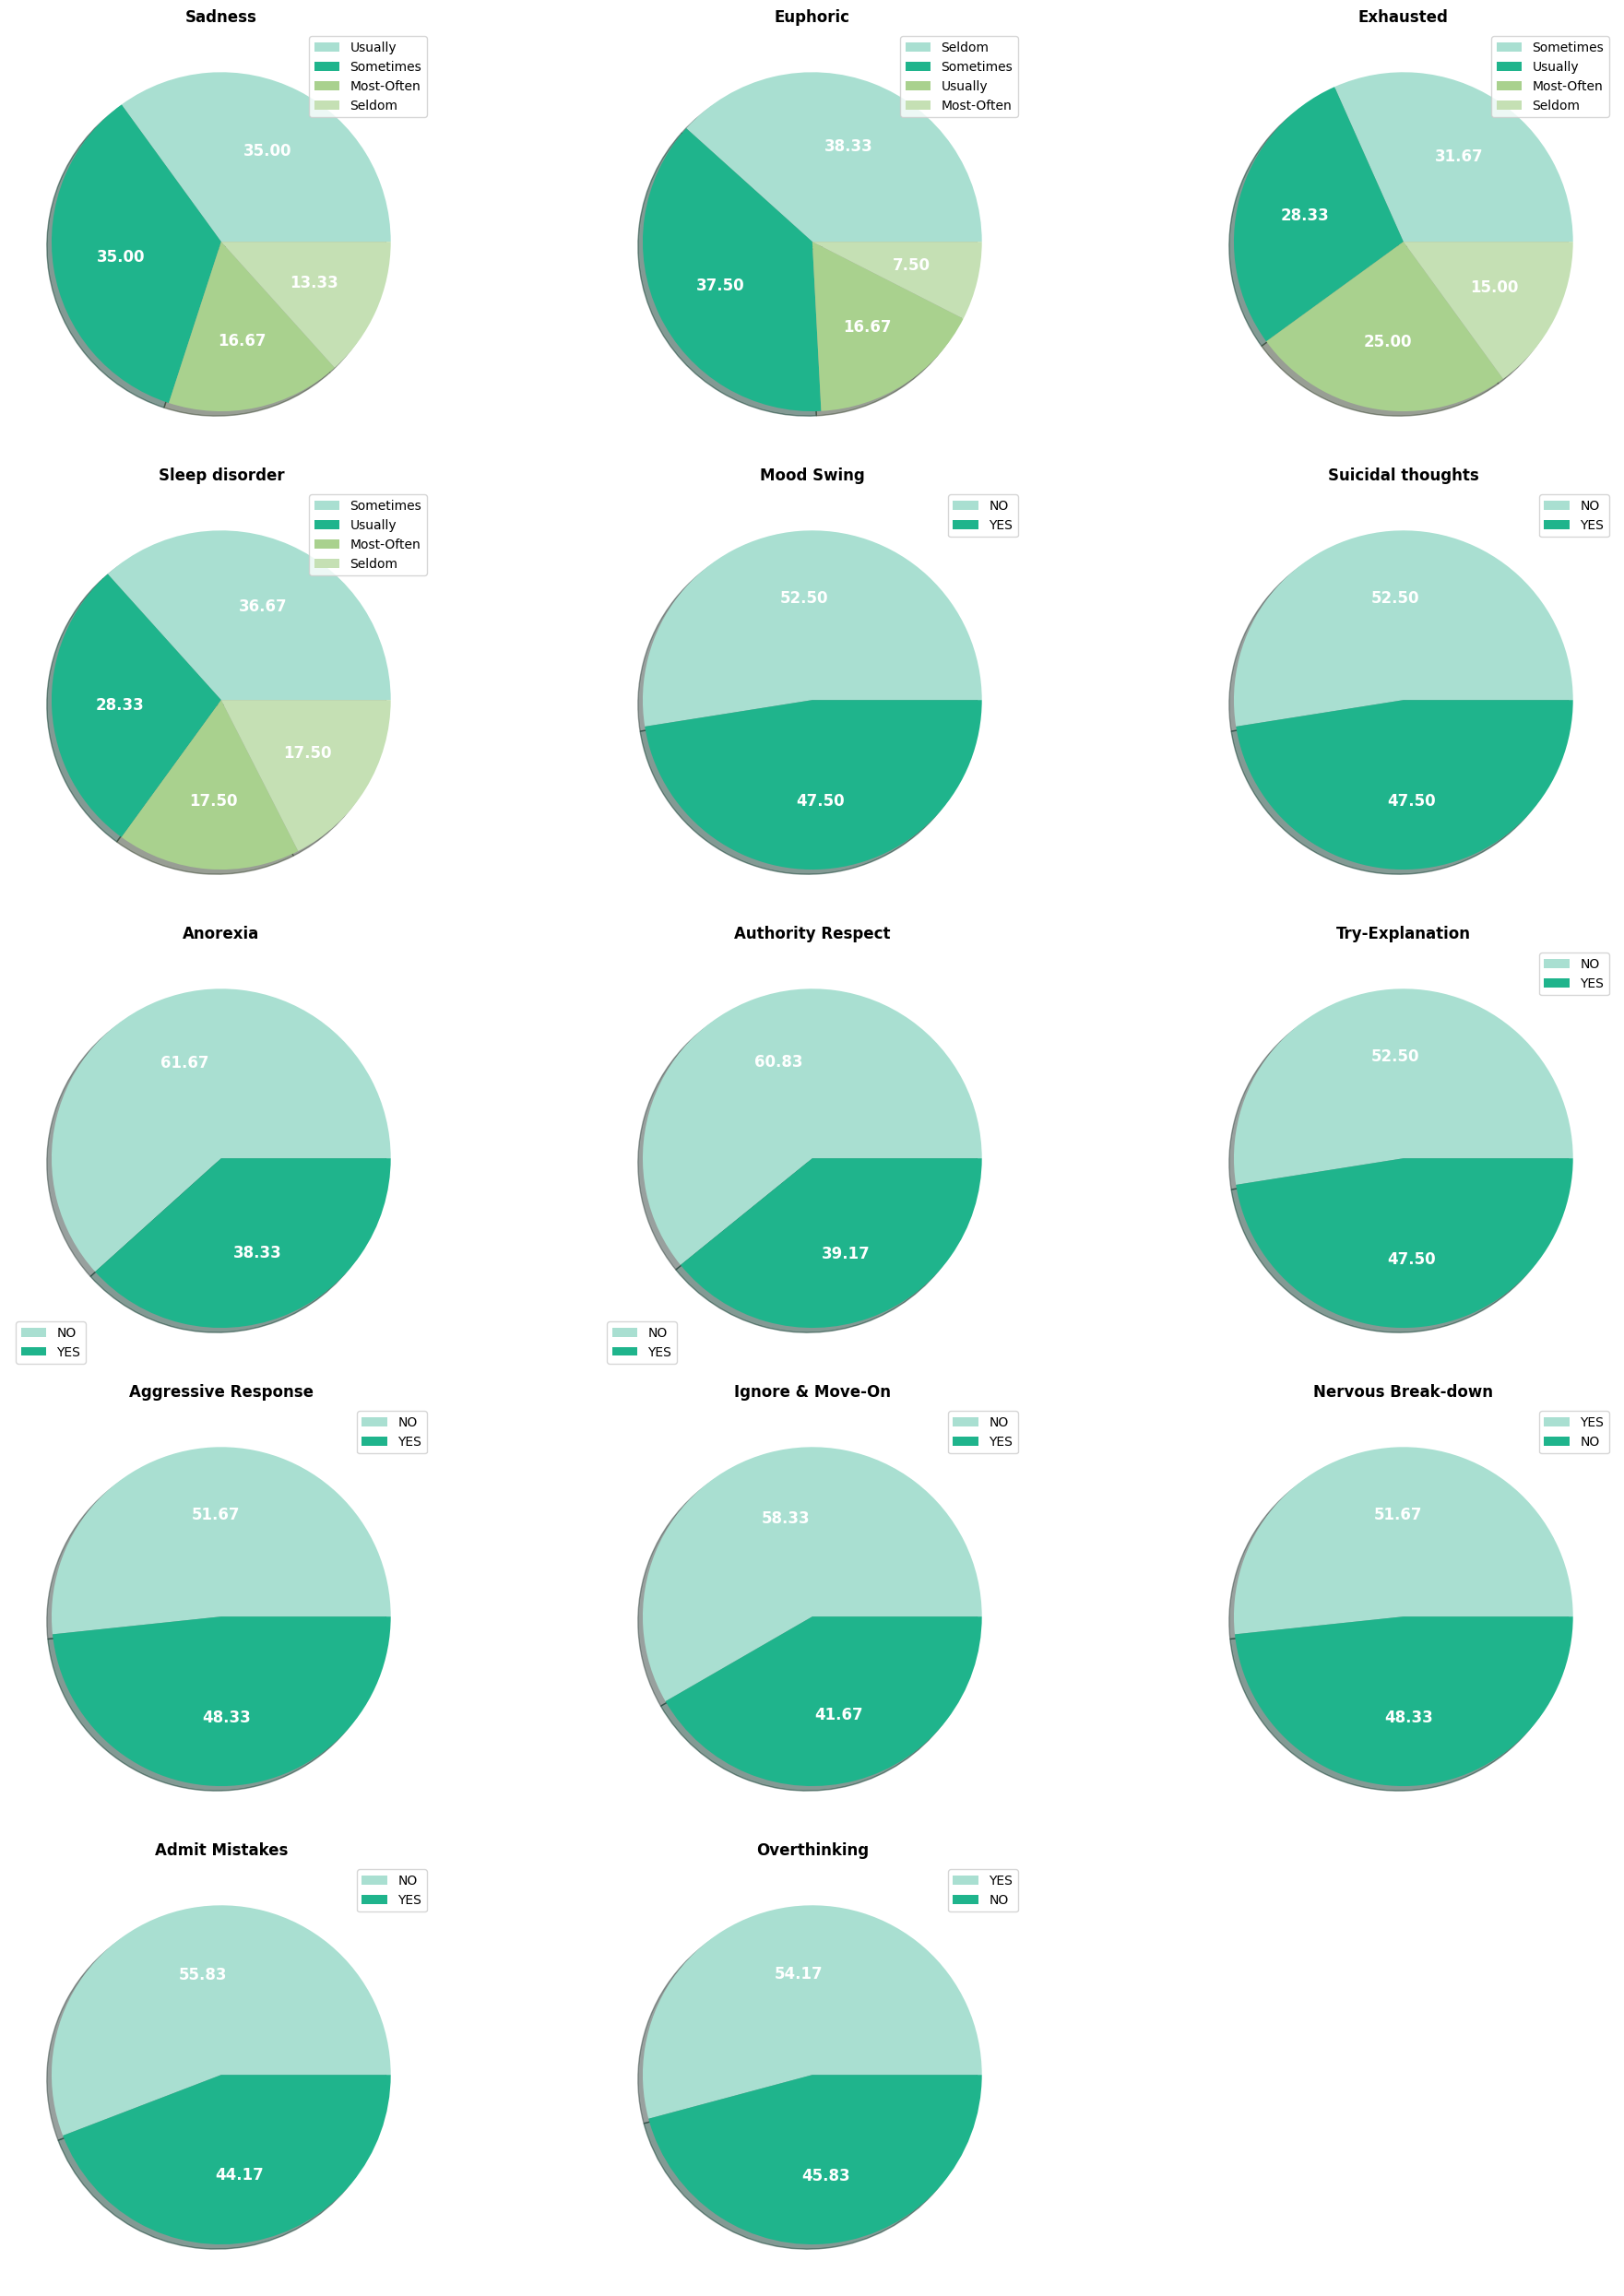

In [16]:
fig, axes = plt.subplots(5, 3, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(disorder.columns[:14]):
    axes[i].pie(disorder[col].value_counts(),autopct='%.2f',textprops = {'color':'white', 'fontsize':12, 'fontweight':'bold'},colors=['#A9DFD1','#1FB48C','#A9D18E','#C5E0B4'],shadow=True)
    axes[i].set_title(col,fontweight='bold')
    axes[i].legend(disorder[col].value_counts().index)

fig.delaxes(axes[14])
plt.tight_layout()
plt.show()

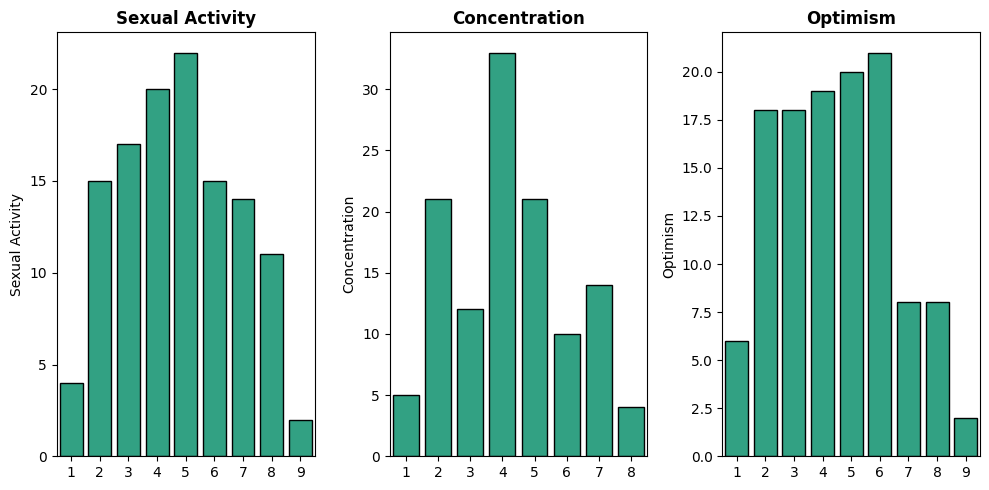

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(disorder.columns[14:17]):
    sns.barplot(x=disorder[col].value_counts().index,y=disorder[col].value_counts(),ax=axes[i],color='#1FB48C',edgecolor='black')
    axes[i].set_title(col,fontweight='bold')



plt.tight_layout()
plt.show()

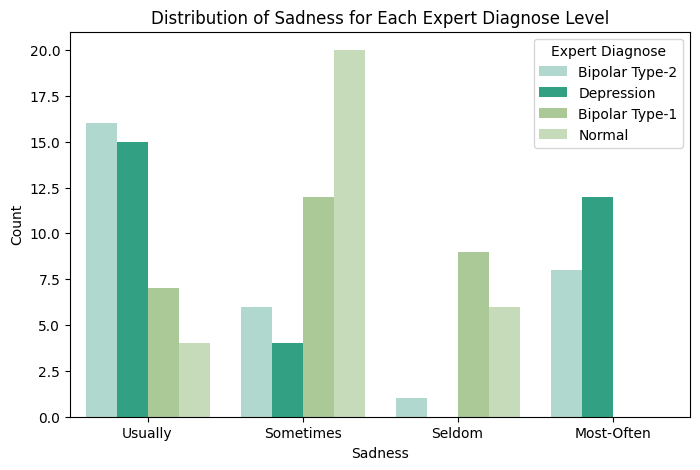

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Sadness', hue = 'Expert Diagnose', data = disorder,palette=['#A9DFD1','#1FB48C','#A9D18E','#C5E0B4'])
plt.title('Distribution of Sadness for Each Expert Diagnose Level')
plt.xlabel('Sadness')
plt.ylabel('Count')
plt.show()

Sadder the patient, more likely to suffer from a mental disorder.

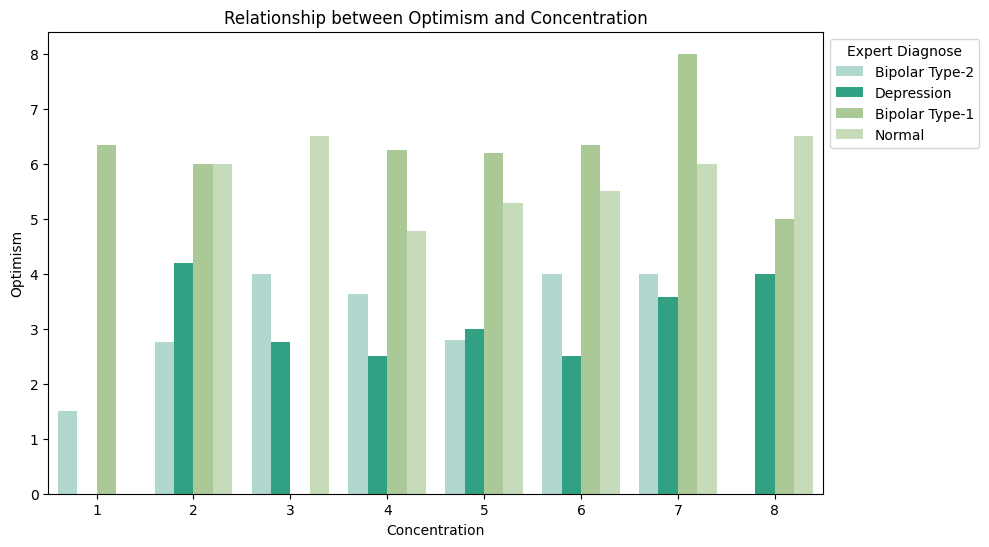

In [19]:
plt.figure(figsize=(10, 6))

sns.barplot(y = 'Optimism', x = 'Concentration', hue = 'Expert Diagnose', data = disorder, errorbar = None, palette = ['#A9DFD1','#1FB48C','#A9D18E','#C5E0B4'])
plt.title('Relationship between Optimism and Concentration')
plt.xlabel('Concentration')
plt.ylabel('Optimism')

# place the legend at the top-right corner of the plot, outside the plot area
plt.legend(title = 'Expert Diagnose', bbox_to_anchor=(1, 1))

plt.show()

Patients with high optimism and concentration are less prone to mental disorders.

# Feature Engineering

## Converting categorical to numerical values

In [20]:
# columns: Sadness, Euphoric,Exhausted,Sleep Disorder
disorder = disorder.replace({'Seldom':1,'Sometimes':2,'Usually':3,'Most-Often':4})

# columns: Mood swings,Suicidal thoughts,Anorexia,Authority Respect, Try-Explanation,
# Aggressive Response,Ignore & Move-On, Nervous Break-down,Admit Mistakes,Overthinking
disorder = disorder.replace({'YES':1,'NO':0})

# columns: Expert Diagnose
disorder = disorder.replace({'Normal':0,'Depression':1,'Bipolar Type-2':2,'Bipolar Type-1':3})

In [21]:
display(disorder.head())

,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,2
Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,1
Patiant-03,2,4,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,3
Patiant-04,3,1,3,4,1,1,1,0,1,0,0,0,0,0,3,2,2,2
Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,0


## Checking Correlation

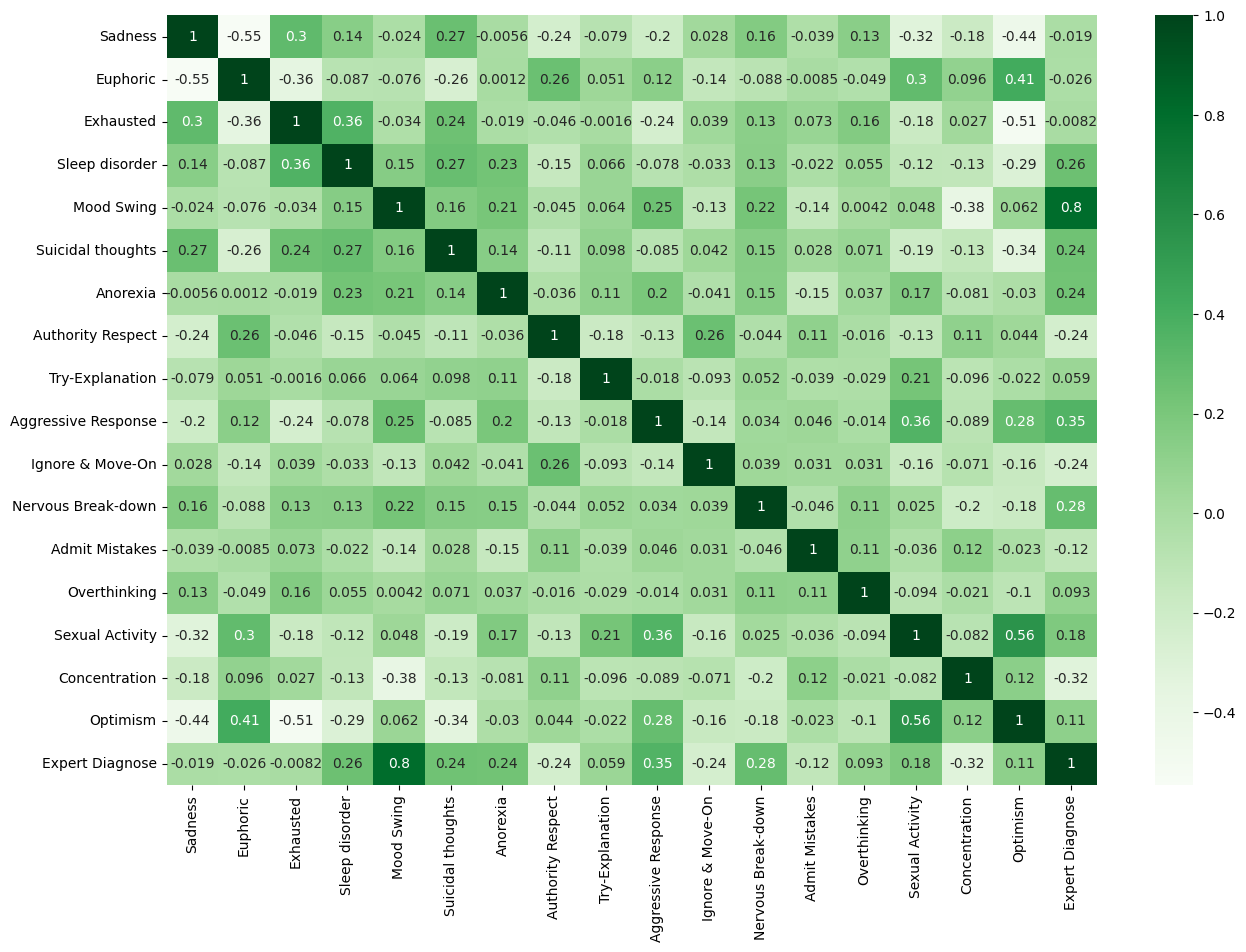

In [22]:
corr = disorder.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="Greens")
plt.savefig('my_graph.png')
plt.show()

## Detecting Outliers

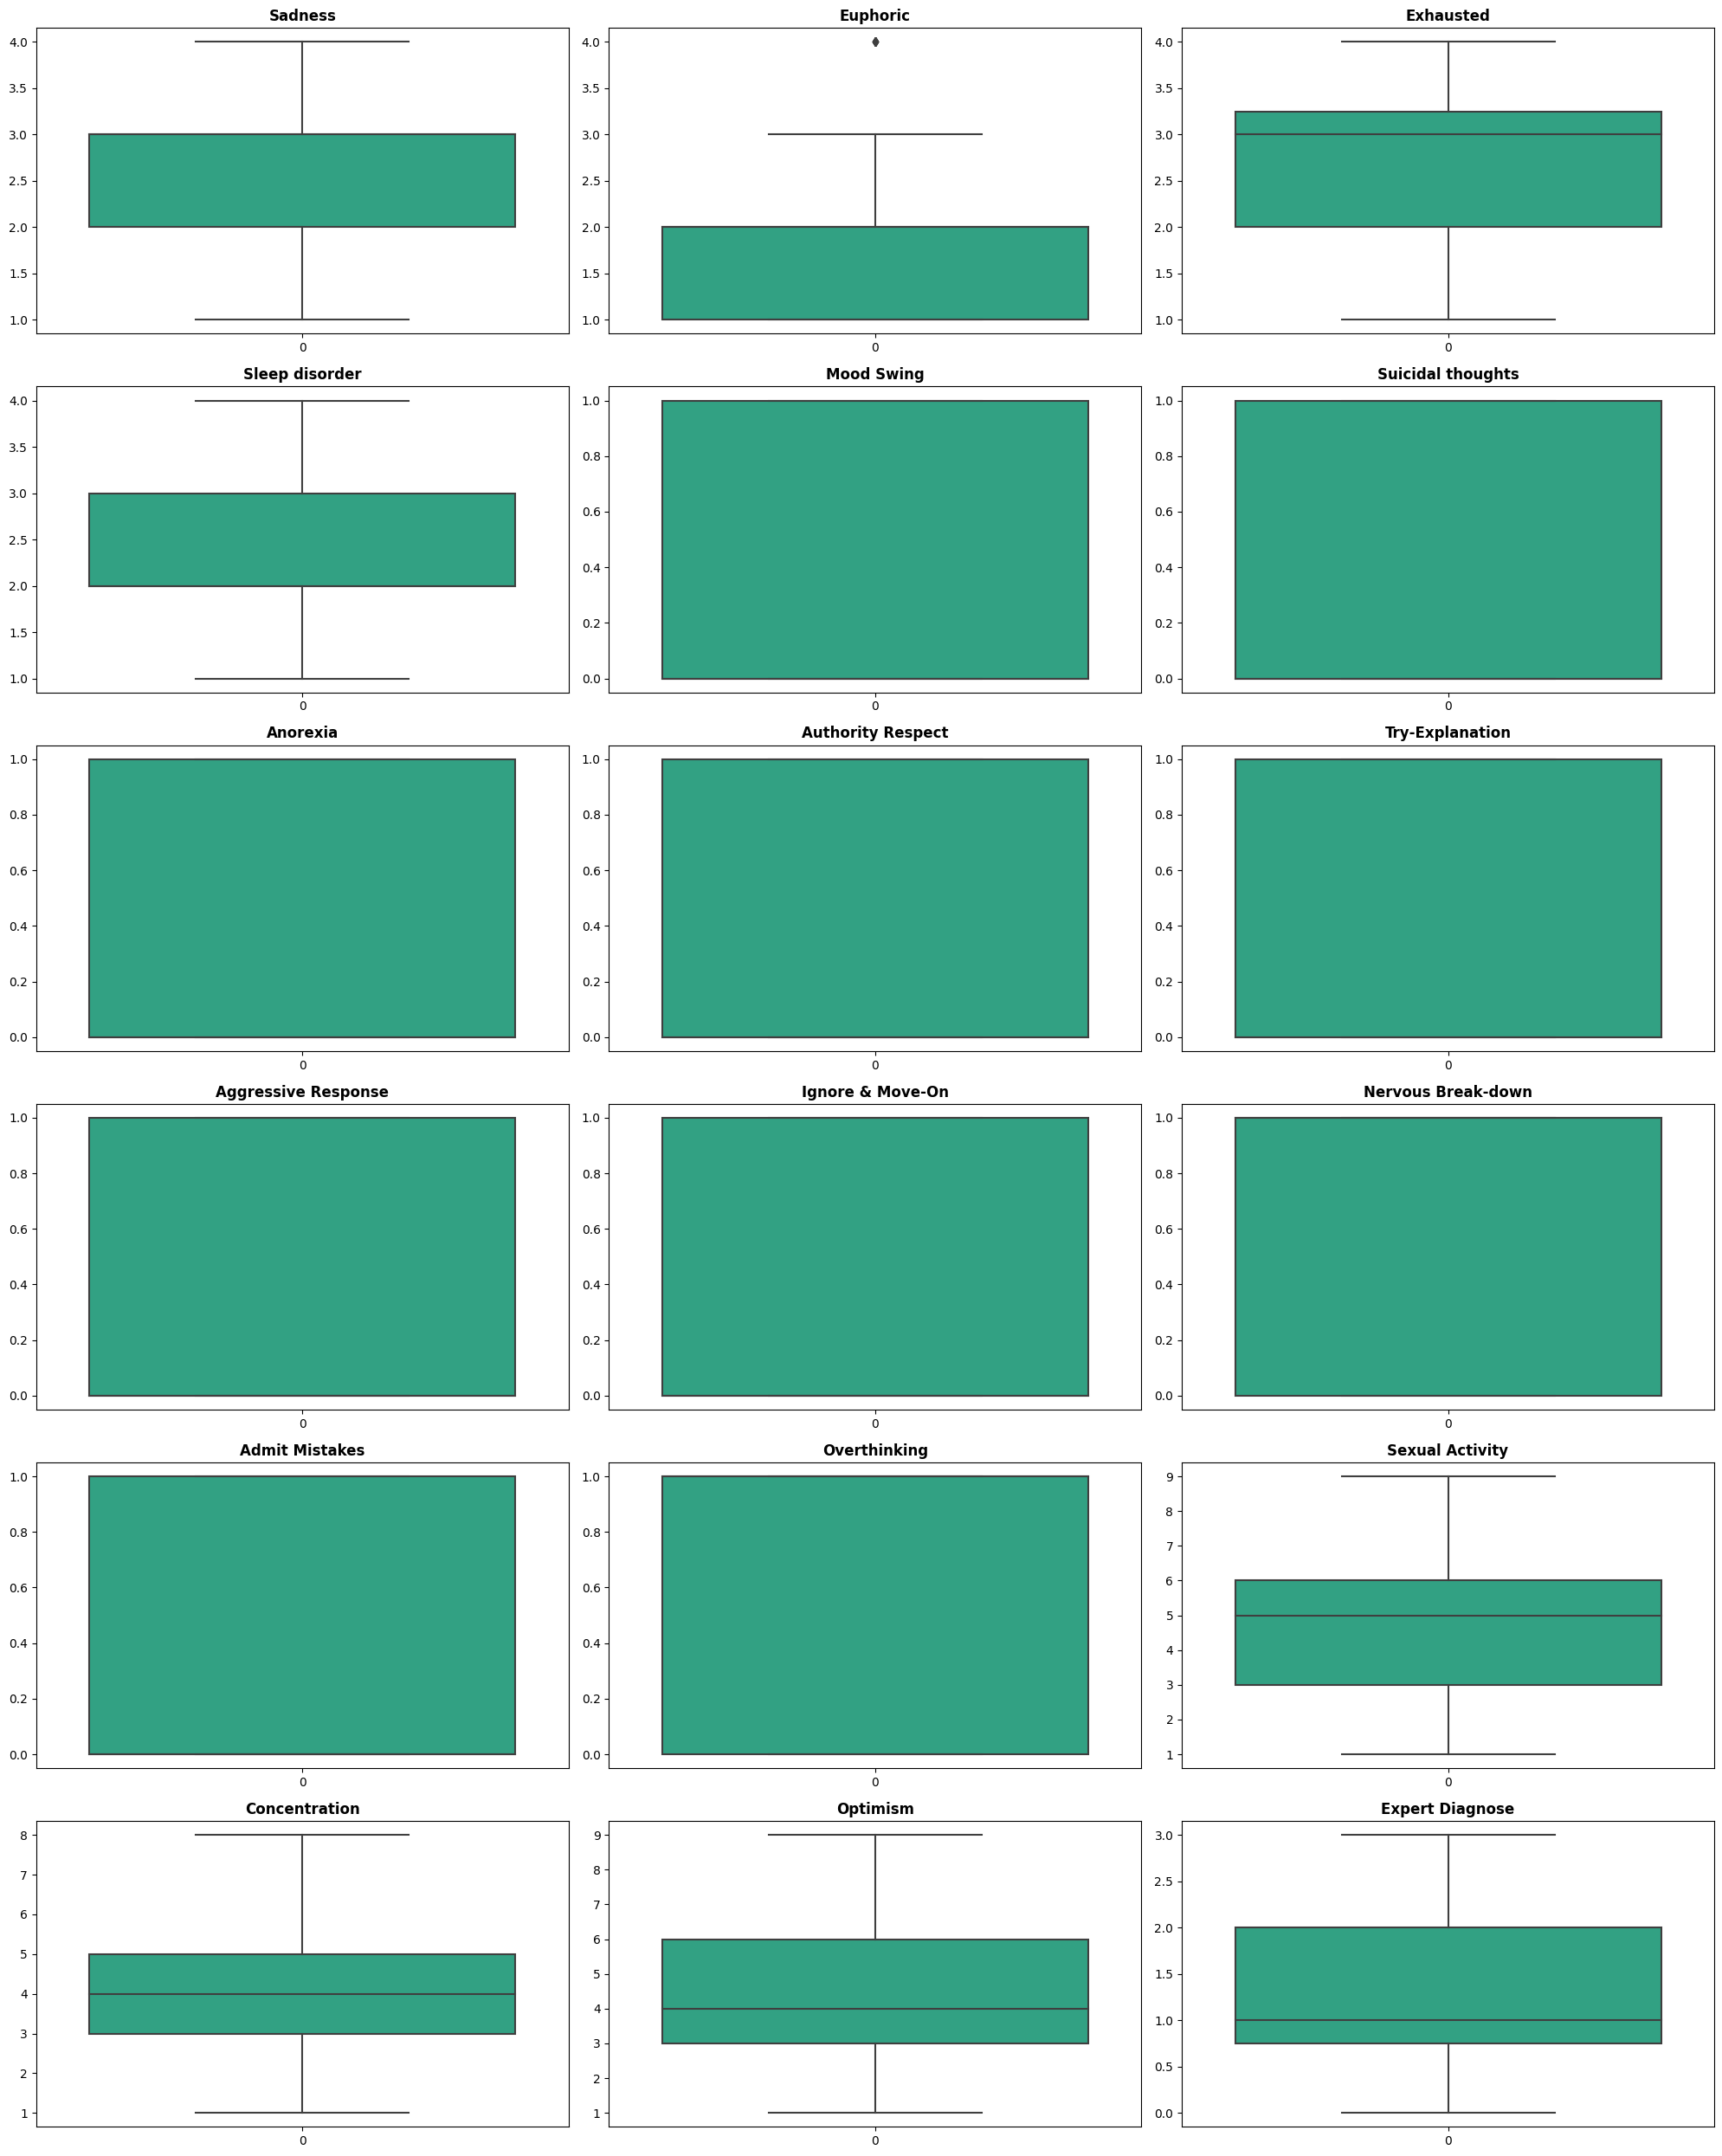

In [23]:
fig, axes = plt.subplots(6, 3, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(disorder.columns):
    sns.boxplot(disorder[col],ax=axes[i],color='#1FB48C')
    axes[i].set_title(col,fontweight='bold')

plt.tight_layout()
plt.show()

## PCA

In [24]:
X = disorder.drop('Expert Diagnose',axis=1)
y = disorder['Expert Diagnose']

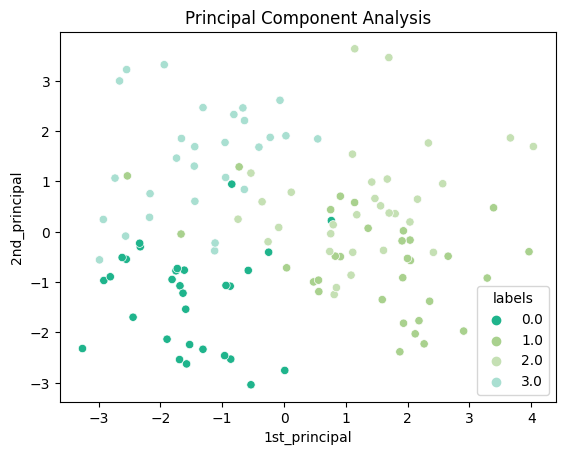

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)

pca_data = pca.fit_transform(X_scaled)

pca_data = np.vstack((pca_data.T,y)).T

pca_df = pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','labels'))

sns.scatterplot(data=pca_df,x='1st_principal',y='2nd_principal',hue='labels',palette = ['#1FB48C','#A9D18E','#C5E0B4','#A9DFD1'])
plt.title('Principal Component Analysis')
plt.show()

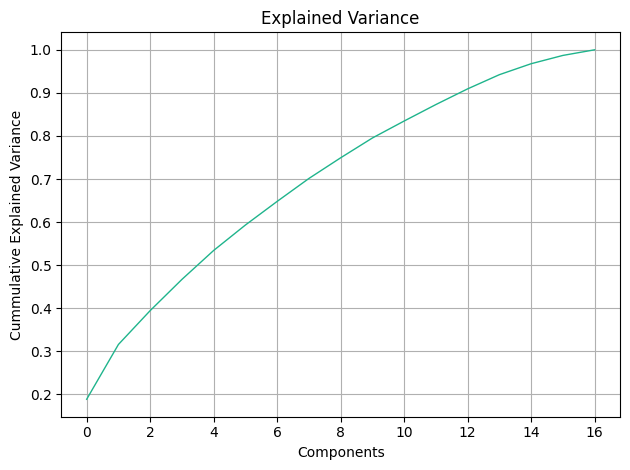

In [26]:
pca.n_components = 17
pca_data = pca.fit_transform(X_scaled)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

plt.plot(cum_var_explained,linewidth=1,color='#1FB48C')
plt.title('Explained Variance')
plt.xlabel('Components')
plt.ylabel('Cummulative Explained Variance')
plt.tight_layout()
plt.grid()
plt.show()

# Model Training

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,train_size=0.7,random_state=SEED)

In [28]:
print('Shape of train dataset:', X_train.shape)
print('Shape of test dataset:', X_test.shape)

Shape of train dataset: (84, 17)
Shape of test dataset: (36, 17)


In [29]:
print('Value count of y_train')
print(y_train.value_counts(),'\n')

print('Value count of y_test')
print(y_test.value_counts())

Value count of y_train
2    21
1    21
0    21
3    21
Name: Expert Diagnose, dtype: int64 

Value count of y_test
2    10
1    10
0     9
3     7
Name: Expert Diagnose, dtype: int64


In [30]:
smote = RandomOverSampler()
X_train,y_train = smote.fit_resample(X_train,y_train)

In [31]:
def score_check(y_true,y_pred):
    print('Accuracy of the model:',accuracy_score(y_true,y_pred))
    print('Precision of the model:',precision_score(y_true,y_pred,average='macro'))
    print('Recall of the model:',recall_score(y_true,y_pred,average='macro'))
    print('Classification Report:\n\n',classification_report(y_true,y_pred))

In [32]:
def display_matrix(y_true,y_pred,model):
    cm = confusion_matrix(y_true,y_pred,labels=model.classes_)
    sns.heatmap(cm,annot=True,cmap='Greens')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

## Base Models

### Logistic Regression

In [33]:
logistic_regression = LogisticRegression(random_state=SEED)
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)
lr_accuracy = accuracy_score(y_test,y_pred)
lr_recall = recall_score(y_test,y_pred,average='macro')

In [34]:
score_check(y_test,y_pred)

Accuracy of the model: 0.8611111111111112
Precision of the model: 0.8819444444444444
Recall of the model: 0.875
Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.70      0.82        10
           2       1.00      0.80      0.89        10
           3       0.78      1.00      0.88         7

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



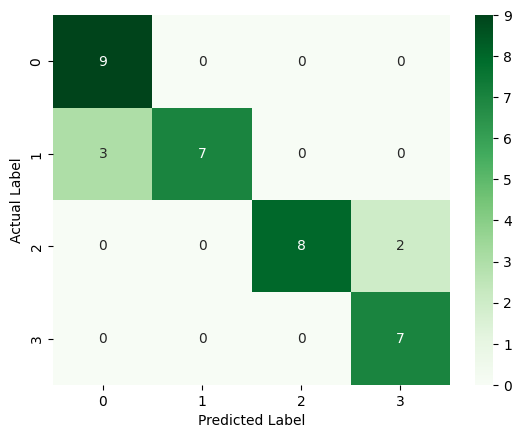

In [35]:
display_matrix(y_test,y_pred,logistic_regression)

### Support Vector Classifier

In [36]:
svc = SVC(random_state=SEED)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,y_pred)
svc_recall = recall_score(y_test,y_pred,average='macro')

In [37]:
score_check(y_test,y_pred)

Accuracy of the model: 0.8611111111111112
Precision of the model: 0.8795454545454546
Recall of the model: 0.875
Classification Report:

               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.80      0.89        10
           2       1.00      0.70      0.82        10
           3       0.70      1.00      0.82         7

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.90      0.86      0.86        36



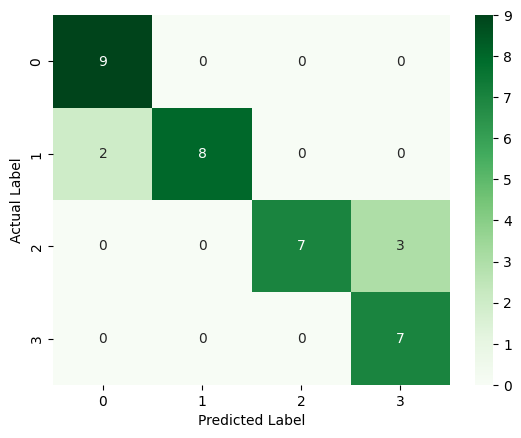

In [38]:
display_matrix(y_test,y_pred,svc)

### KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,y_pred)
knn_recall = recall_score(y_test,y_pred,average='macro')

In [40]:
score_check(y_test,y_pred)

Accuracy of the model: 0.8055555555555556
Precision of the model: 0.825
Recall of the model: 0.8142857142857143
Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.80      0.80      0.80        10
           2       1.00      0.60      0.75        10
           3       0.75      0.86      0.80         7

    accuracy                           0.81        36
   macro avg       0.82      0.81      0.80        36
weighted avg       0.83      0.81      0.80        36



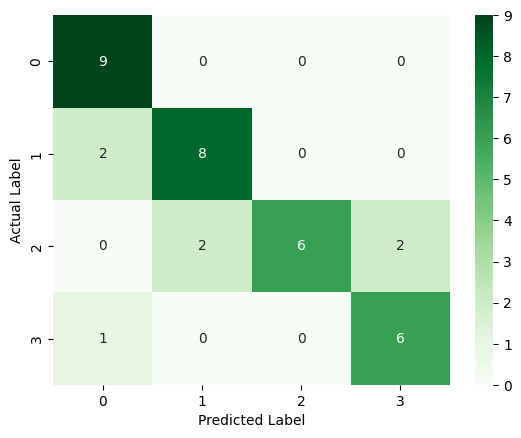

In [41]:
display_matrix(y_test,y_pred,knn)

### Random Forest

In [42]:
random_forest = RandomForestClassifier(random_state=SEED)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test,y_pred)
rf_recall = recall_score(y_test,y_pred,average='macro')

In [43]:
score_check(y_test,y_pred)

Accuracy of the model: 0.9166666666666666
Precision of the model: 0.9232954545454546
Recall of the model: 0.925
Classification Report:

               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.80      0.89        10
           2       1.00      0.90      0.95        10
           3       0.88      1.00      0.93         7

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36



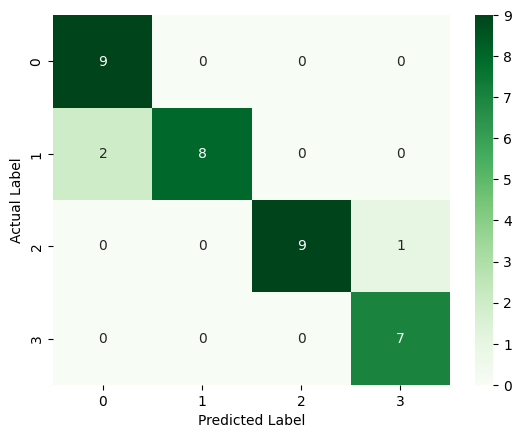

In [44]:
display_matrix(y_test,y_pred,random_forest)

## Hyperparameter Tuning

### Logistic Regression

In [45]:
parameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'tol':[1e-4,1e-3,1e-2,1e-1,1e-0,1e1,1e2,1e3,1e4],
              'C':np.logspace(-5,5,20),
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter':[100,500,1000,1500,2000,2500],
              'multi_class' : ['auto', 'ovr', 'multinomial']
             }

log_clf = GridSearchCV(logistic_regression,param_grid=parameters,cv=5,verbose=True,n_jobs=-1,scoring='accuracy')

In [46]:
best_log_reg = log_clf.fit(X_train,y_train)

Fitting 5 folds for each of 64800 candidates, totalling 324000 fits


In [47]:
best_log_reg.best_estimator_

LogisticRegression(C=20.6913808111479, penalty='l1', random_state=7,
                   solver='liblinear')

In [48]:
y_pred = best_log_reg.predict(X_test)
best_lr_accuracy = accuracy_score(y_test,y_pred)
best_lr_recall = recall_score(y_test,y_pred,average='macro')

In [49]:
score_check(y_test,y_pred)

Accuracy of the model: 0.8888888888888888
Precision of the model: 0.90625
Recall of the model: 0.9
Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.70      0.82        10
           2       1.00      0.90      0.95        10
           3       0.88      1.00      0.93         7

    accuracy                           0.89        36
   macro avg       0.91      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



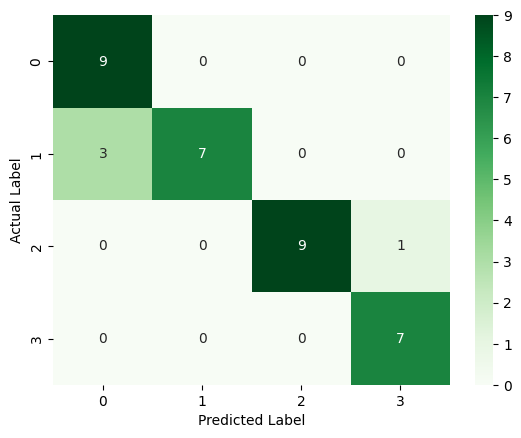

In [50]:
display_matrix(y_test,y_pred,best_log_reg)

### Random Forest

In [51]:
parameters = {'n_estimators':[int(x) for x in np.linspace(10,100,20)],
              'criterion':["gini", "entropy", "log_loss"],
              'max_depth':list(range(2,11)),
              'min_samples_split':[2,5,7],
              'max_features':["sqrt", "log2", None],
              'min_samples_leaf':[1,2],
              'bootstrap':[True,False]
             }
rf_clf = RandomizedSearchCV(random_forest,param_distributions=parameters,cv=5,verbose=True,n_jobs=-1,random_state=SEED,scoring='accuracy')

In [52]:
best_rf_clf = rf_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [53]:
best_rf_clf.best_estimator_

RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=2,
                       random_state=7)

In [54]:
y_pred = best_rf_clf.predict(X_test)
best_rf_accuracy = accuracy_score(y_test,y_pred)
best_rf_recall = recall_score(y_test,y_pred,average='macro')

In [55]:
score_check(y_test,y_pred)

Accuracy of the model: 0.9444444444444444
Precision of the model: 0.94375
Recall of the model: 0.95
Classification Report:

               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.90      0.95        10
           2       1.00      0.90      0.95        10
           3       0.88      1.00      0.93         7

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



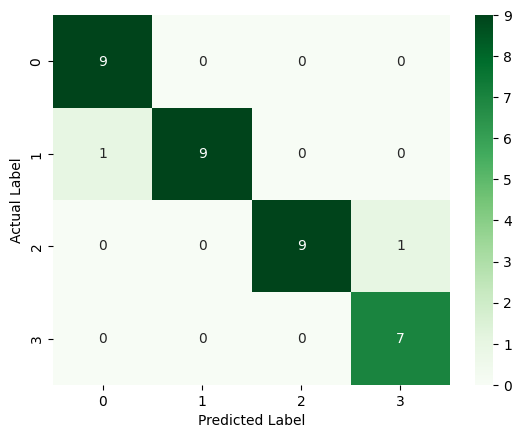

In [56]:
display_matrix(y_test,y_pred,best_rf_clf)

Hyperparameter tuning is making the model to overfit.

## Neural Network

In [57]:
nn_model = Sequential([
    Dense(512, activation='tanh', input_shape=(X_train.shape[1],)),
    Dropout(rate=0.1),
    Dense(512, activation='tanh'),
    Dense(512, activation='tanh'),
    Dense(4, activation='softmax')
])

In [58]:
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
history=nn_model.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 1.0521 - accuracy: 0.5238
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2580 - accuracy: 0.9167
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1551 - accuracy: 0.9286
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.9762
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0495 - accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0410 - accuracy: 0.9881
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 11/100
3/3 [===========

In [60]:
y_pred = nn_model.predict(X_test)
y_pred_mlp = np.argmax(y_pred, axis=1)

2/2 [==============================] - 0s 3ms/step


In [61]:
nn_accuracy = list(nn_model.evaluate(X_test,y_test))[1]
nn_recall = recall_score(y_test,y_pred_mlp,average='macro')

2/2 [==============================] - 0s 2ms/step - loss: 1.0068 - accuracy: 0.8889


In [62]:
score_check(y_test,y_pred_mlp)

Accuracy of the model: 0.8888888888888888
Precision of the model: 0.90625
Recall of the model: 0.9
Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.70      0.82        10
           2       1.00      0.90      0.95        10
           3       0.88      1.00      0.93         7

    accuracy                           0.89        36
   macro avg       0.91      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



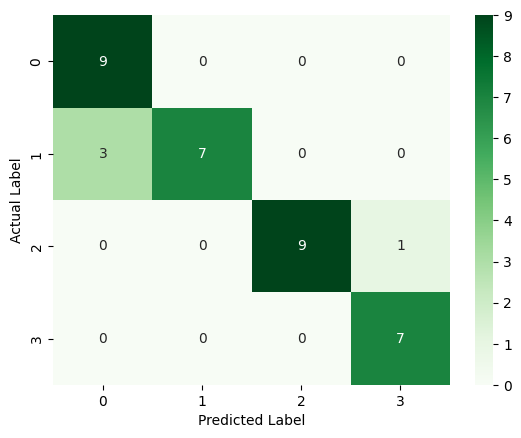

In [63]:
cm = confusion_matrix(y_test,y_pred_mlp)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [64]:
models = pd.DataFrame({'Models':['Logistic Regression','Support Vector Classifier','K-Nearest Neighborhood','Random Forest Classifier', 
                                 'Logistic Regression(tuned)','Random Forest(tuned)','Neural Network'],
                       'Accuracy':[lr_accuracy,svc_accuracy,knn_accuracy,rf_accuracy,best_lr_accuracy,best_rf_accuracy,nn_accuracy],
                               'Recall':[lr_recall,svc_recall,knn_recall,rf_recall,best_lr_recall,best_rf_recall,nn_recall]})

display(models.sort_values(by='Accuracy',ascending=False))

,Models,Accuracy,Recall
5,Random Forest(tuned),0.944444,0.950000
3,Random Forest Classifier,0.916667,0.925000
6,Neural Network,0.888889,0.900000
4,Logistic Regression(tuned),0.888889,0.900000
0,Logistic Regression,0.861111,0.875000
1,Support Vector Classifier,0.861111,0.875000
2,K-Nearest Neighborhood,0.805556,0.814286


In [65]:
with open('models/random_forest.pkl','wb') as file:
    pickle.dump(best_rf_clf,file)

In [66]:
with open('models/logistic_regreesion.pkl','wb') as file:
    pickle.dump(best_log_reg,file)

In [67]:
nn_model.save('models/nn_model.h5')